In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
import ciso8601

sns.set_style('darkgrid')
sns.set_context('notebook')

***Load submissions***

In [2]:
path = './submissions_scraped/'

files = []
for filename in os.listdir(path):
    files.append(pd.read_csv(os.path.join(path, filename)))
    
files = pd.concat(files)
df_submissions = pd.DataFrame(files)
df_submissions.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df_submissions.sample(5)

,title,author,score,id,subreddit,url,num_comments,body,created
4248,Narrow ribbon-like stools? IBS? Cancer?,NaN,1,qv8ouo,ibs,NaN,0,[removed],2021-11-16 15:13:50
2539,i pooped myself today,schoolkuss66,1,q8s5dr,ibs,https://www.reddit.com/r/ibs/comments/q8s5dr/i...,0,[removed],2021-10-15 18:34:11
20849,GERD alongside Crohn's,angimxox,4,x9unug,CrohnsDisease,https://www.reddit.com/r/CrohnsDisease/comment...,14,Just got basically told it's possible I have G...,2022-09-09 14:48:48
15851,Guess who had an adverse reaction to Remicade ...,readthisresistor,26,u4eae4,CrohnsDisease,https://www.reddit.com/r/CrohnsDisease/comment...,26,Me! 🙃,2022-04-15 20:19:21
5644,I am changing meds and suffering on the toilet...,cupcakeswirl730,15,nl5yg1,UlcerativeColitis,https://www.reddit.com/r/UlcerativeColitis/com...,8,My dog was supportive at first but then he got...,2021-05-26 04:13:11


## Data Insights

In [4]:
print('Number of subsmissions: ', df_submissions.shape[0])
print('Subreddits: ', df_submissions.subreddit.unique())

Number of subsmissions:  78646
Subreddits:  ['UlcerativeColitis' 'IBD' 'CrohnsDisease' 'ibs']


## Data Visualization

***Comparing subreddits***

In [5]:
subreddits = ['CrohnsDisease', 'ibs', 'IBD', 'UlcerativeColitis']
colors = ['#6730EC', '#7984EE', '#A9D2FF', '#D2F6FC']

In [6]:
df_crohns = df_submissions[df_submissions['subreddit'] == 'CrohnsDisease']
df_ibs = df_submissions[df_submissions['subreddit'] == 'ibs']
df_ibd = df_submissions[df_submissions['subreddit'] == 'IBD']
df_ulc = df_submissions[df_submissions['subreddit'] == 'UlcerativeColitis']

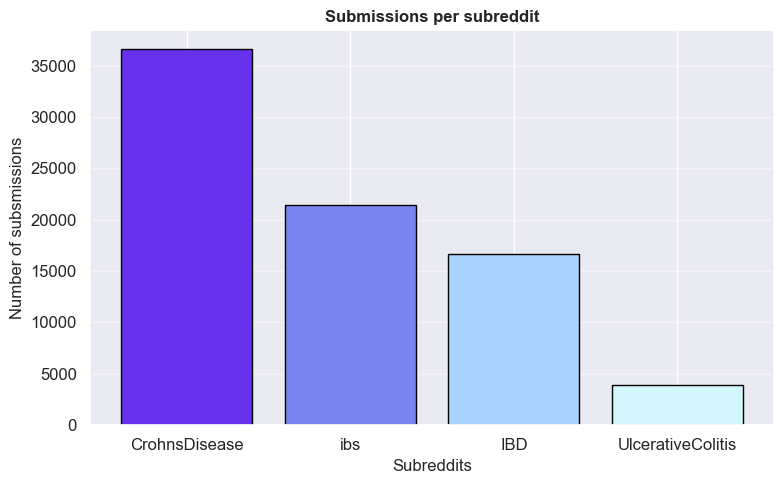

In [7]:
plt.figure(figsize=(8,5))

plt.bar(subreddits, df_submissions.subreddit.value_counts(), edgecolor='black', color=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Submissions per subreddit', weight='bold')
plt.ylabel('Number of subsmissions')
plt.xlabel('Subreddits')

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

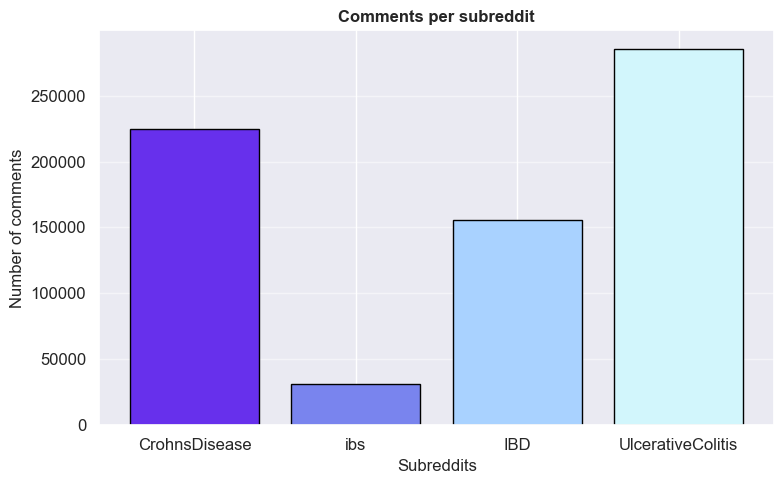

In [8]:
plt.figure(figsize=(8,5))

plt.bar(subreddits, df_submissions.groupby('subreddit').num_comments.sum(), edgecolor='black', color=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Comments per subreddit', weight='bold')
plt.ylabel('Number of comments')
plt.xlabel('Subreddits')

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show();

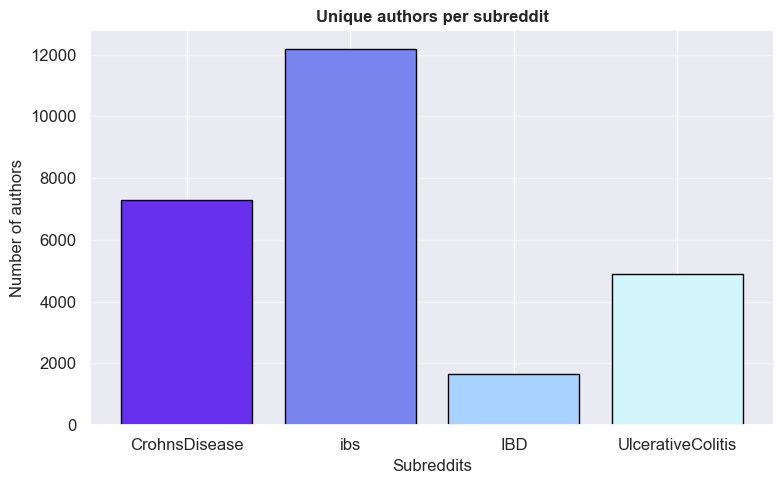

In [9]:
# Unique authors per subreddits

unique_authors = [len(df_crohns.author.unique()), len(df_ibs.author.unique()), 
                  len(df_ibd.author.unique()), len(df_ulc.author.unique())]

plt.figure(figsize=(8,5))

plt.bar(subreddits, unique_authors, edgecolor='black', color=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Unique authors per subreddit', weight='bold')
plt.ylabel('Number of authors')
plt.xlabel('Subreddits')

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show();

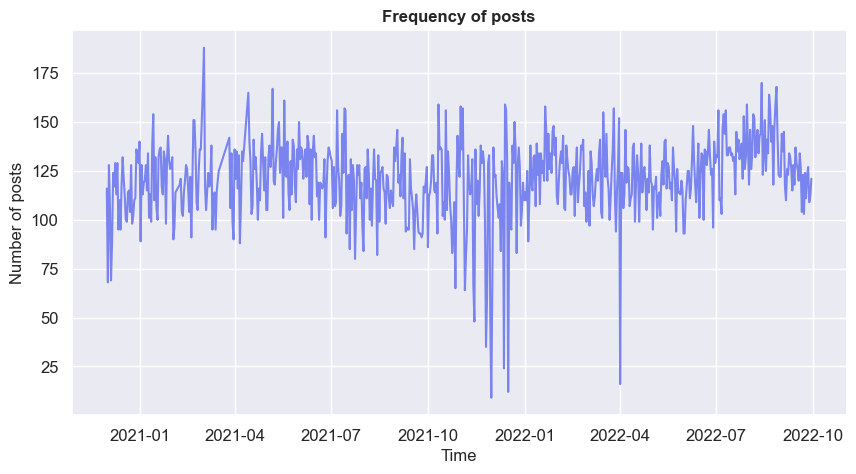

In [33]:
dates_df = df_submissions.astype({'created': 'datetime64[D]'})
dates = df_submissions.astype({"created":"datetime64[D]"}).created.unique()
posts_per_day = dates_df.groupby(['created'])['id'].count()

plt.figure(figsize=(10,5))
plt.title('Frequency of posts', weight='bold')
sns.lineplot(x=dates, y=posts_per_day, color=colors[1])

plt.ylabel('Number of posts')
plt.xlabel('Time')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [90]:
# DEFINE YEAR-MONTH RANGES TO LOOK UP 
today = dt.datetime.today()

today_month = today.month
today_year = today.year

start_year = 2020
start_month = 12
dates = []
while start_year <= today_year:
    
    if start_year == today_year and start_month > today_month:
        break
        
    dates.append((start_year, start_month))
    
    start_month += 1
    if start_month > 12:
        start_year += 1
        start_month = 1
        


